In [33]:
import pandas as pd
import matplotlib.pyplot as plt                   
import seaborn as sns
import numpy as np

In [34]:
df=pd.read_csv(r"D:\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.dropna # odrzucamy wiersze z wartościami NaN
df=df.drop(['StandardHours','Over18','EmployeeCount','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion', 'YearsWithCurrManager','JobLevel','TotalWorkingYears'], axis=1)



In [35]:
df_numeric=df._get_numeric_data()
numeric_cols=list(df_numeric.columns)
print(numeric_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [36]:
def make_boxplot(columns,data_frame):
    for i, col in enumerate(columns):
        plt.figure(i)
        ax = sns.boxplot(
                          x=col, 
                          hue="Attrition",
                          data=data_frame,
                          gap=.3,
                          native_scale=True,
                          flierprops={"marker": "o"},
                          width=.5,
                          
                        
                        )
        ax.axvline(df[col].mean(), color=".3", dashes=(2, 2))



In [37]:
def make_violinplot(columns,df):
    for i, col in enumerate(columns):
        plt.figure(i)
        ax = sns.violinplot(data=df, y=col, hue="Attrition", split=True, gap=.1, inner="quart")
        

In [38]:
def make_swarmplot(columns,df):
    for i, col in enumerate(columns):
        plt.figure(i)
        ax = sns.swarmplot(data=df, x=col, hue="Attrition", size=3,dodge=True,)

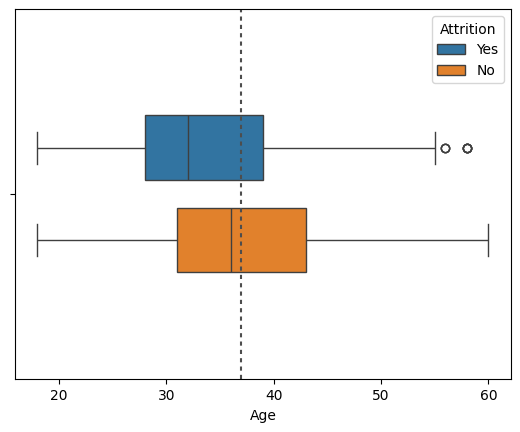

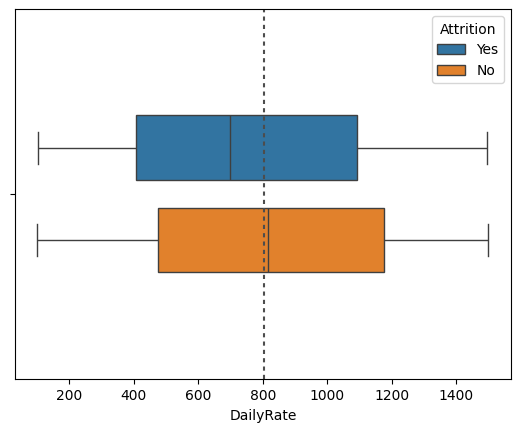

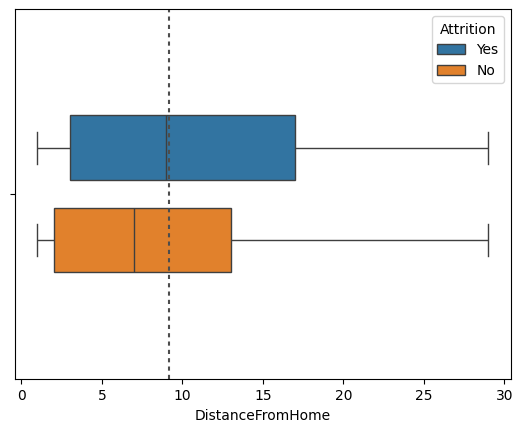

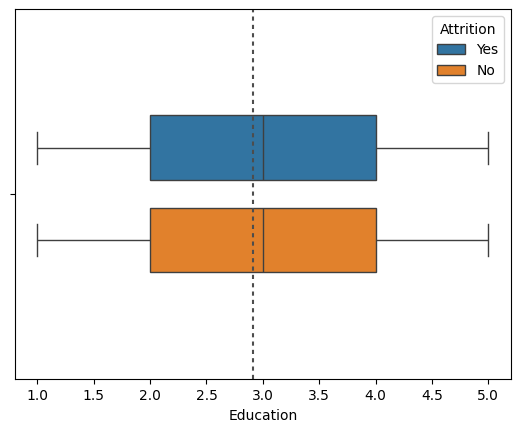

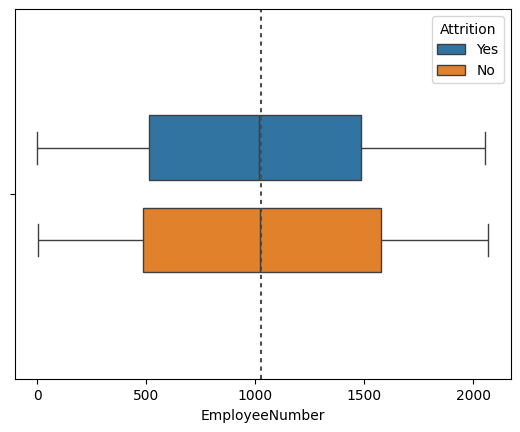

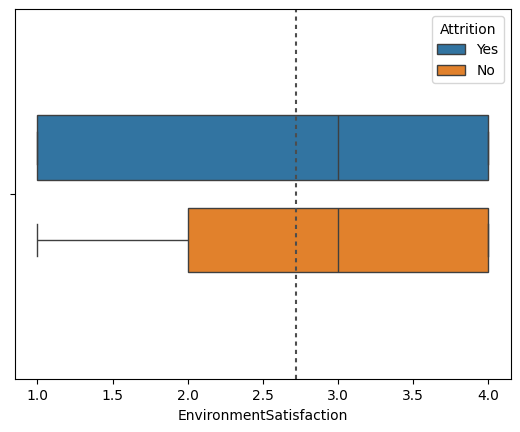

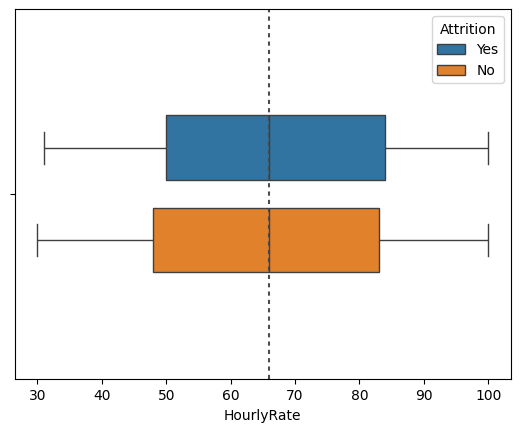

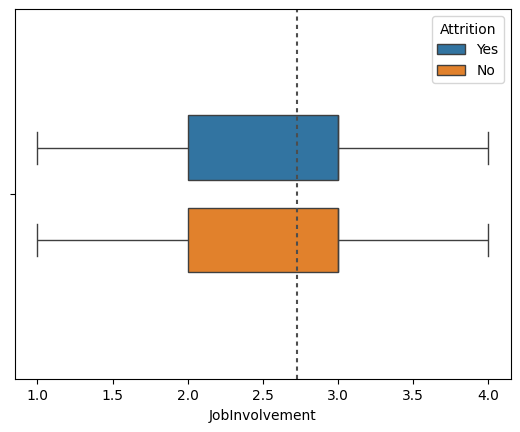

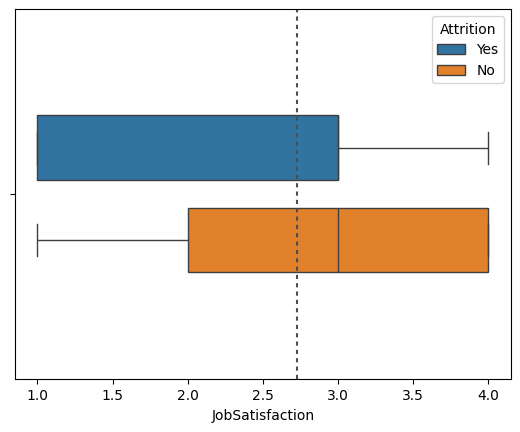

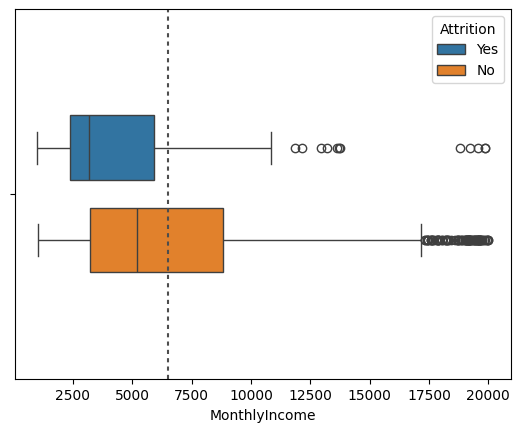

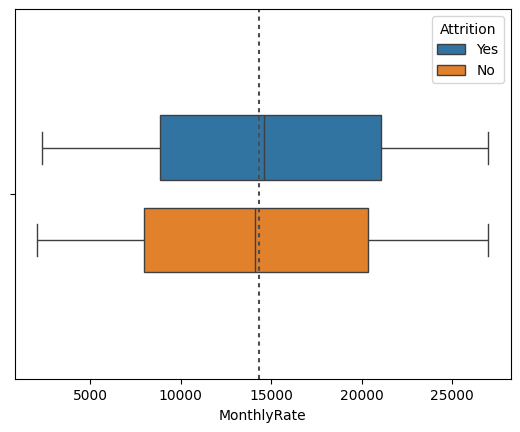

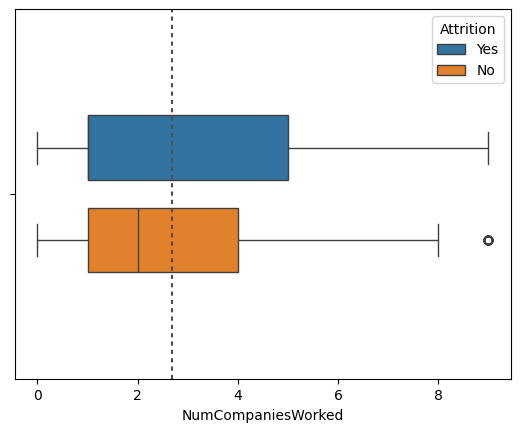

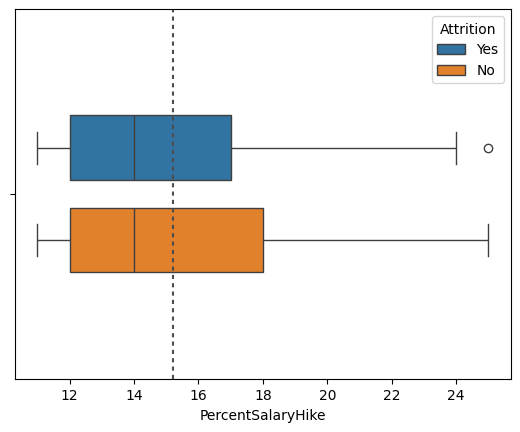

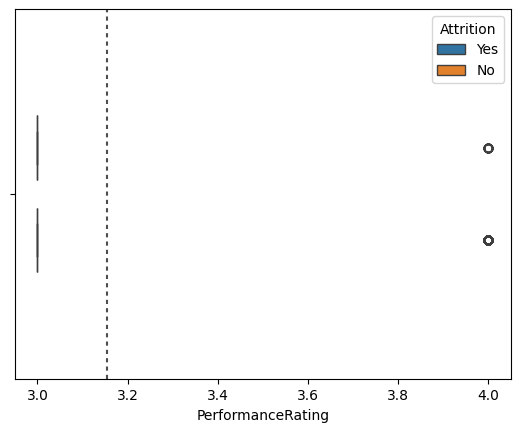

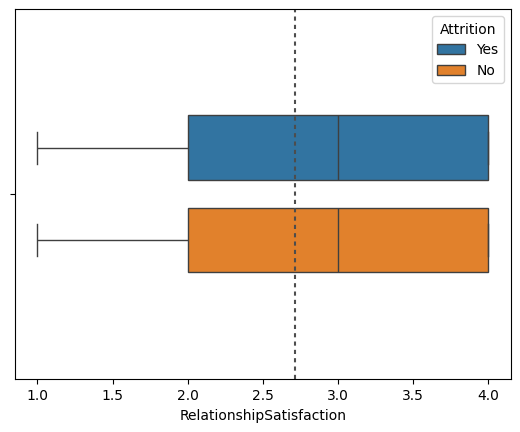

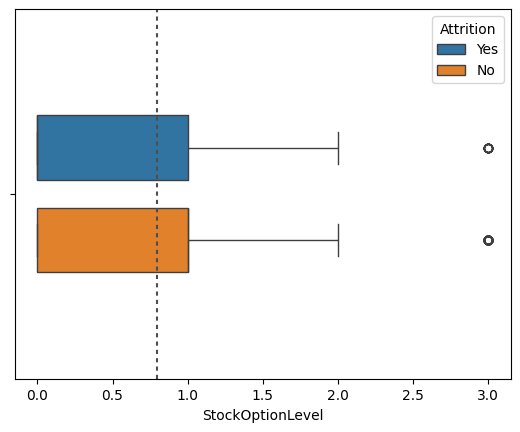

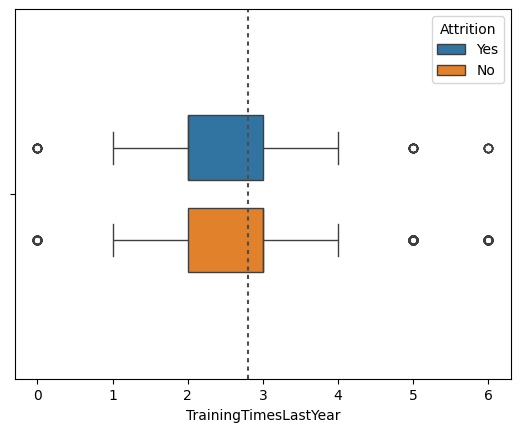

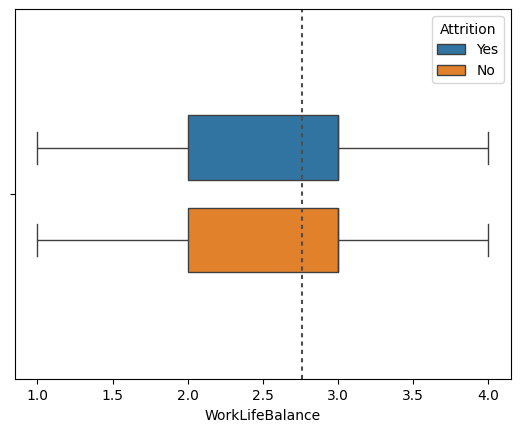

In [39]:
make_boxplot(numeric_cols,df)

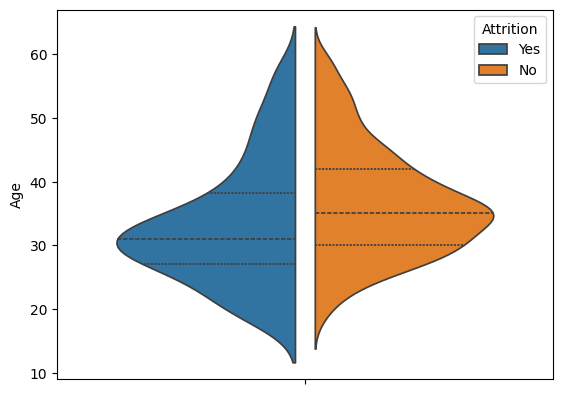

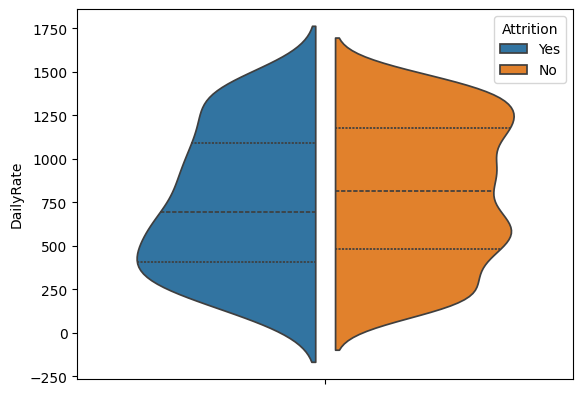

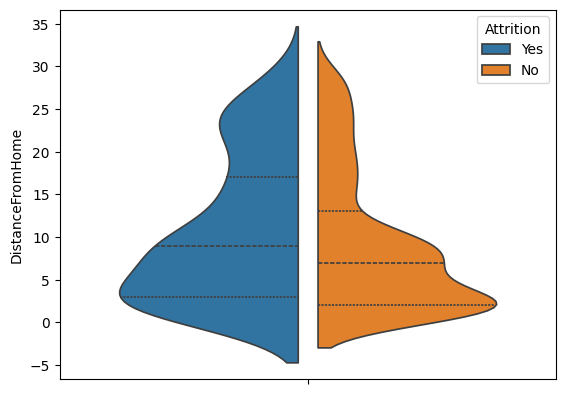

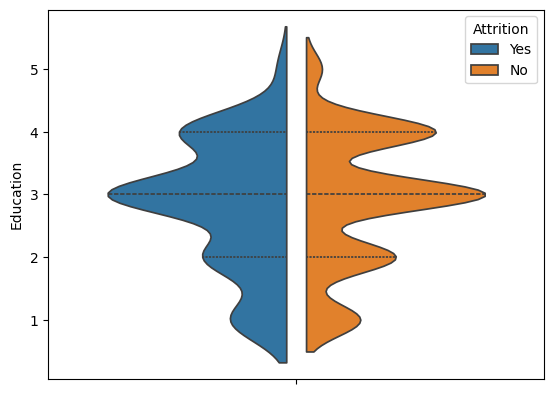

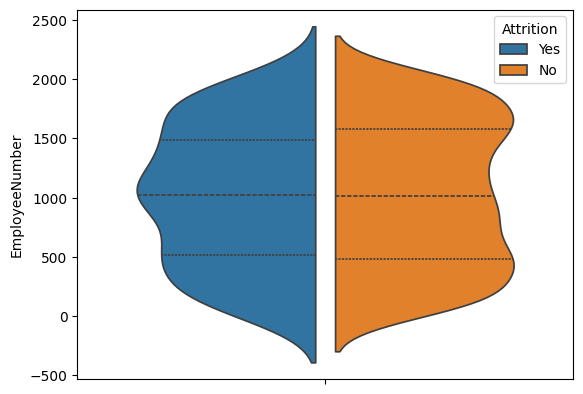

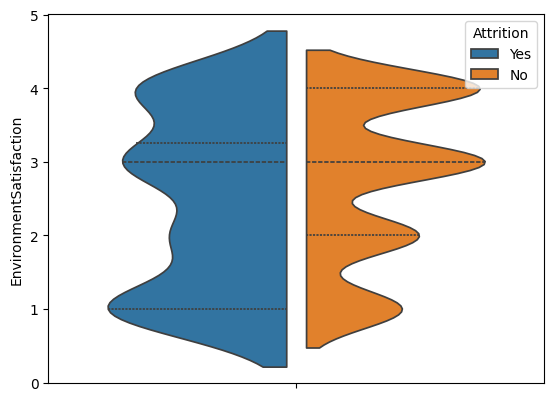

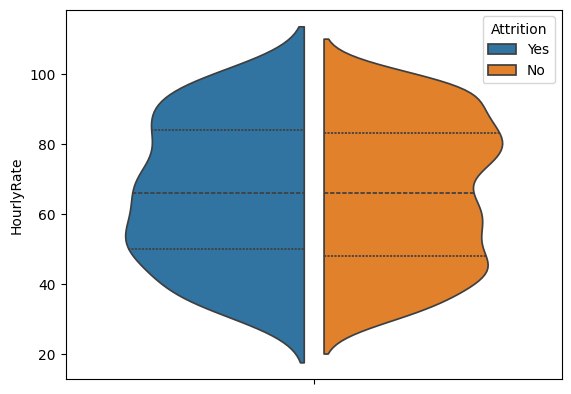

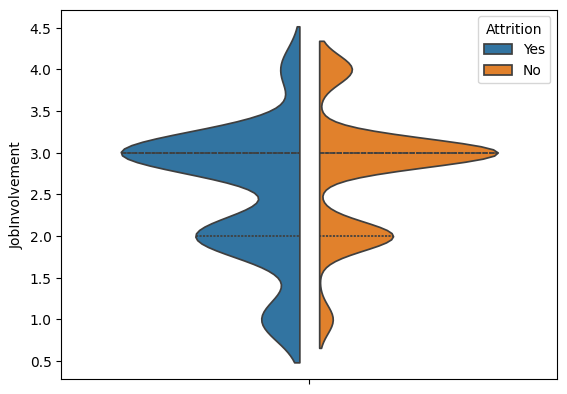

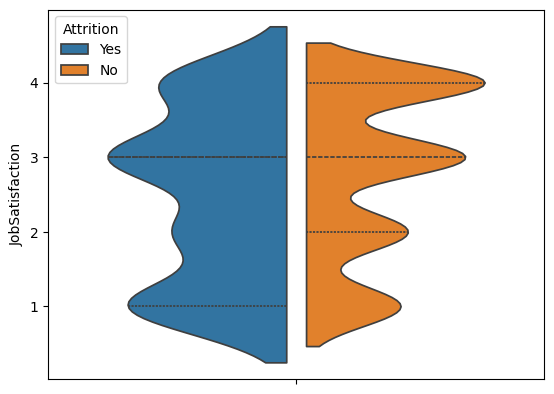

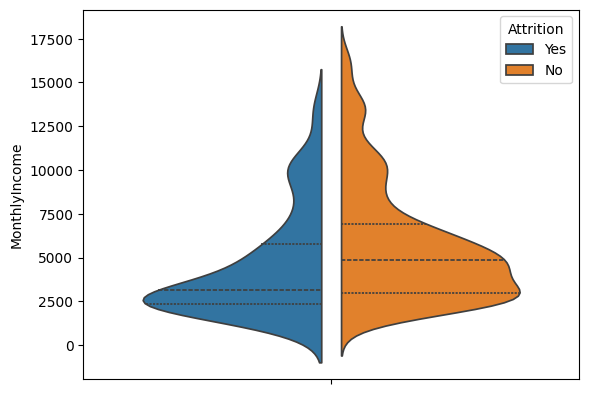

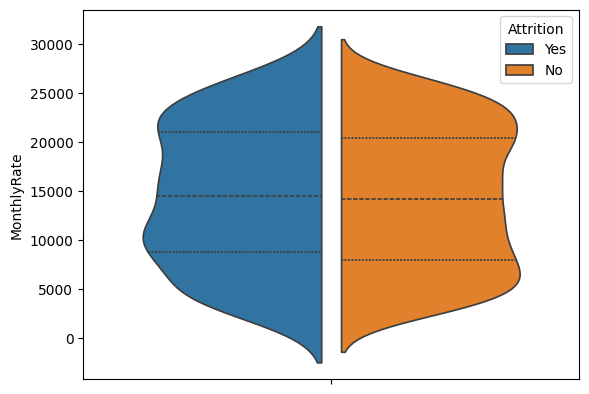

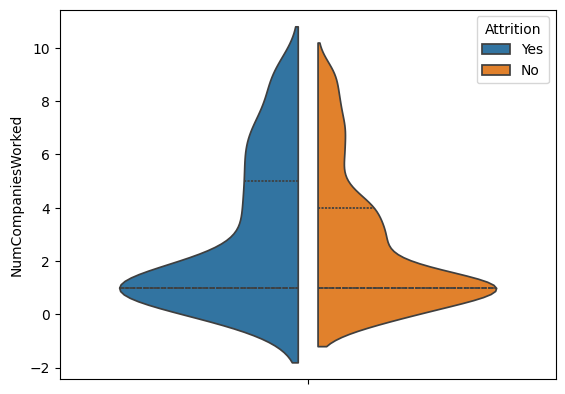

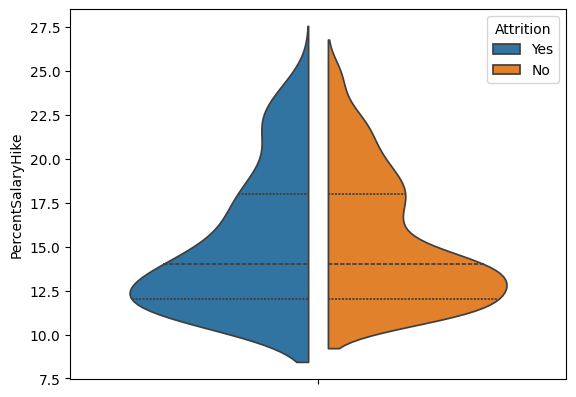

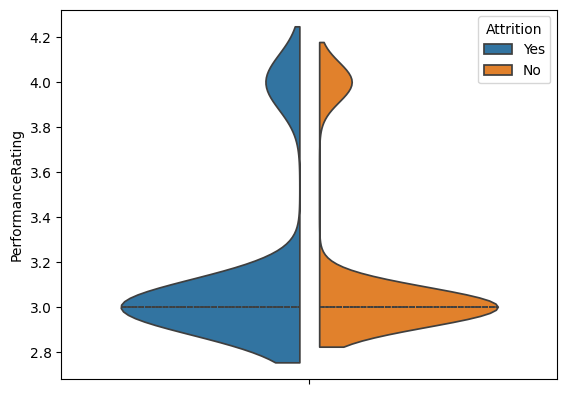

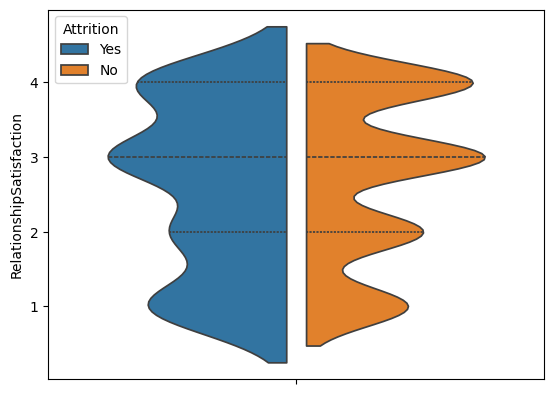

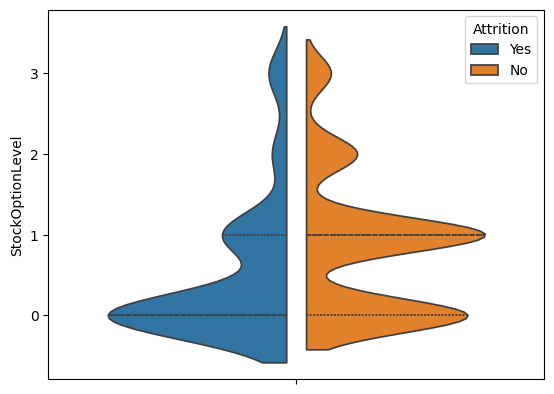

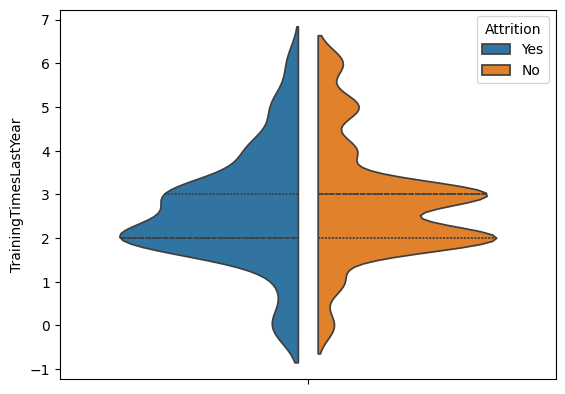

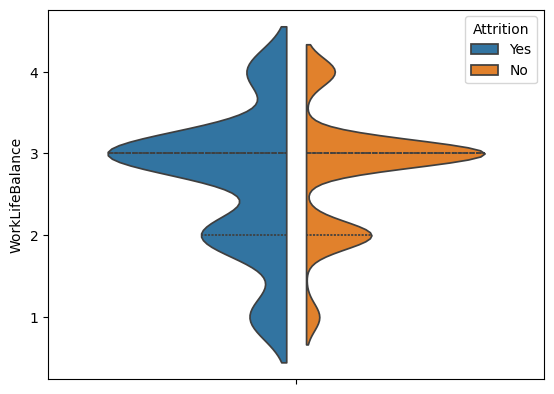

In [43]:
make_violinplot(numeric_cols,df)

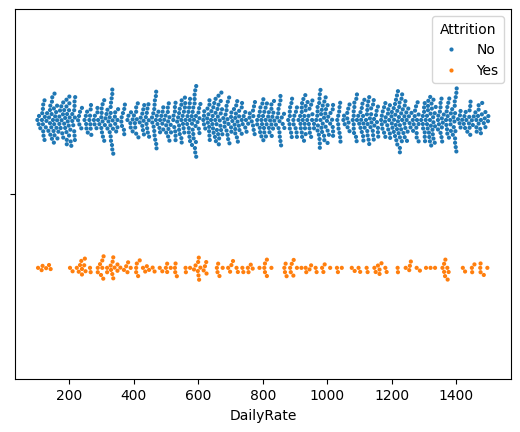

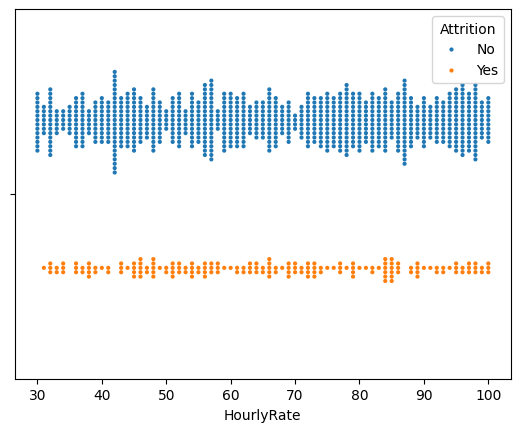

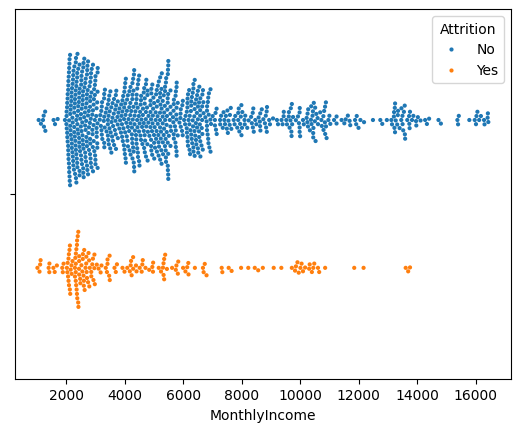

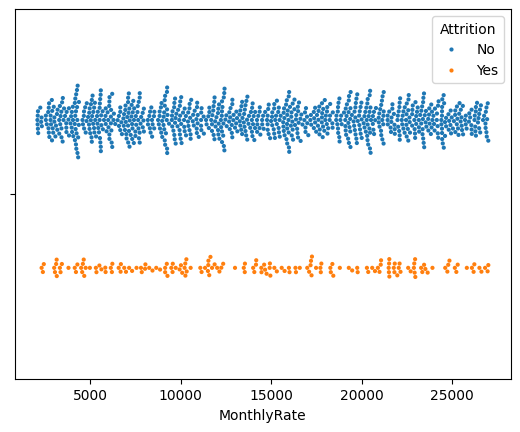

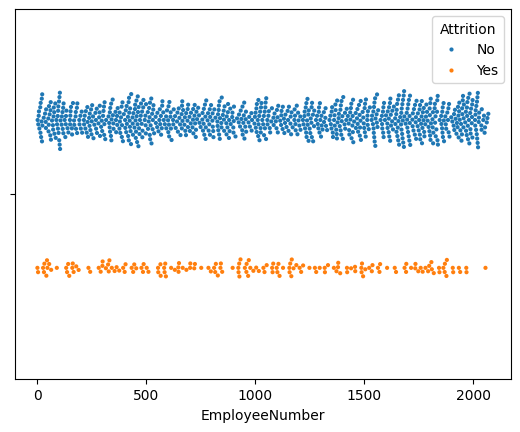

In [44]:
swarm_cols=['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','EmployeeNumber']

make_swarmplot(swarm_cols,df.sample(1000))

Old Shape:  (1470, 26)
New Shape:  (1356, 26)


<AxesSubplot: xlabel='MonthlyIncome'>

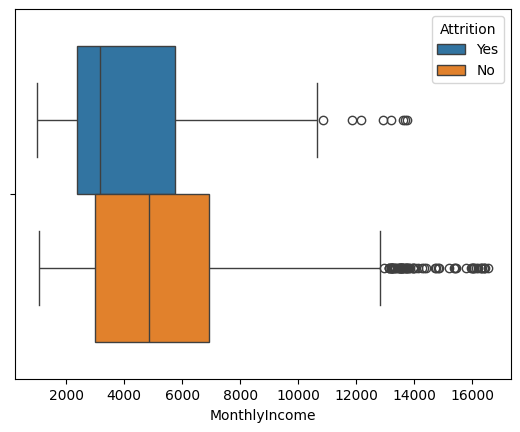

In [42]:
# IQR
Q1 = np.percentile(df['MonthlyIncome'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df['MonthlyIncome'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['MonthlyIncome'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['MonthlyIncome'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='MonthlyIncome',hue="Attrition", data=df)